#              Engineering Salary Prediction Using Linear Regression

**Name:** Ahel Eappan  
**Registration No.:** 12307418 
 **Course:** B.Tech CSE (Data Science & Engineering)  
**Subject:** Descriptive Analysis CSD301

## Problem Statement

In the current competitive job market, it is essential that engineering graduates and recruiters know the determinants of salary. This project seeks to forecast the anticipated salary of engineering graduates depending on their academic records, skillsets, and other pertinent characteristics.

## Objective

- Know how academic grades, technical competencies, and soft competencies relate to pay.
- Develop and test a Linear Regression model that forecasts the salary of engineering graduates per year.
- Determine the most impactful factors leading to a higher offer of salary.
- Offer actionable tips that can enhance students' employability.

Loading the necessary libraries

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Loading the dataset

In [3]:
df=pd.read_csv('Engineering_graduate_salary.csv')
df

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,103174,f,1989-04-17,75.00,0,2005,73.00,0,1263,2,...,-1,-1,-1,-1,-1.1901,0.9688,-1.0697,1.35490,0.0284,120000
2994,352811,f,1991-07-22,84.00,state board,2008,77.00,state board,9481,2,...,-1,-1,-1,-1,-0.1082,0.0328,-0.4891,-0.29020,0.5024,120000
2995,287070,m,1988-11-24,91.40,bsemp,2006,65.56,bsemp,547,2,...,-1,-1,-1,-1,-0.8810,0.1888,-0.3440,0.06230,0.6603,385000
2996,317336,m,1988-08-25,88.64,karnataka education board,2006,65.16,karnataka education board,1629,2,...,-1,-1,-1,-1,1.4374,1.2808,-0.4891,-1.46537,0.5419,530000


 
### Column Descriptions

| **Column**             | **Description** |
|------------------------|-----------------|
| **ID**                 | Unique identifier for each candidate. It has no predictive capability and is for record-keeping purposes. |
| **Gender**             | Genders the candidate as either "Male" or "Female." It can assist in gender-based trend analysis, although this feature must be handled with ethical considerations. |
| **10percentage**       | Percentage score the candidate scored in their 10th-grade (secondary school) exam, out of a total of 100. It helps assess academic consistency at an early stage. |
| **10board**            | The board of education under which the candidate passed 10th grade (e.g., CBSE, ICSE, or State Board). This can affect scoring trends and academic exposure. |
| **12percentage**       | The percentage scored by the candidate in their 12th-grade (higher secondary) exam, out of 100. This is another academic metric that can be related to college admissions and later success. |
| **12board**            | The education board for the 12th-grade examinations. Various boards can have different grading systems or criteria. |
| **12stream**           | Stream of study chosen in 12th grade — Science, Commerce, or Arts. This generally determines the candidate's field of study at college. |
| **Degree**             | The undergraduate degree pursued, i.e., B.Tech, B.Sc, BCA, etc. This reveals information on the quality and nature of the academic training received. |
| **Specialization**     | The field or area of specialization within the degree — e.g., Computer Science, Electronics, Information Technology. This might have a fairly significant influence on salary opportunities. |
| **collegeGPA**         | The overall GPA of the candidate in the undergraduate course, typically out of 10. It provides an indication of college-level academic performance. |
| **technicalSkills**    | A score (out of 100) indicating how technically capable the candidate is at programming, databases, operating systems, etc. |
| **aptitudeScore**      | The applicant's test score (out of 100) for an aptitude test, assessing logical reasoning, problem-solving skills, and numeric ability. |
| **communicationSkills**| A measure (out of 100) of verbal and written communication ability — crucial for productivity in the workplace and collaborative working. |
| **teamwork**           | A score (out of 100) indicating the candidate's capacity to work in a team with others — a vital soft skill in any professional role. |
| **leadership**         | A 100-point score that measures leadership traits such as decision-making, initiative, and the capacity to lead a team. |
| **Salary**             | The candidate's annual salary in Indian Rupees (INR), which is the **target variable** to be predicted for this project. |


___

### Examining the Dataset

At this step, we examine the dataset to see how it is structured and what it contains. This involves checking the initial records, determining data types, summarizing numeric features, and looking for missing values or potential data problems.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

In [5]:
df.isnull().sum()

ID                       0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
dtype: int64

No null/missing values where found

In [6]:
df.describe()

,ID,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2.998000e+03,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,...,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03
mean,6.648926e+05,77.666264,2008.080720,74.341061,5210.210807,1.924616,71.509857,5210.210807,0.296197,2011.939960,...,24.138759,16.267845,31.068379,1.946965,-0.038714,0.126217,-0.008662,-0.145965,-0.141111,3.051748e+05
std,3.648951e+05,10.002785,1.631814,11.120299,4776.609877,0.264053,8.122462,4776.609877,0.456655,36.780582,...,99.785138,86.054739,103.552963,32.241501,1.024974,0.955831,0.962695,1.012901,1.007134,2.123312e+05
min,1.124400e+04,43.000000,1998.000000,40.000000,2.000000,1.000000,6.630000,2.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04
25%,3.334648e+05,71.140000,2007.000000,66.000000,526.250000,2.000000,66.530000,526.250000,0.000000,2012.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05
50%,6.396945e+05,78.965000,2008.000000,74.000000,4027.500000,2.000000,71.800000,4027.500000,0.000000,2013.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05
75%,9.951770e+05,85.600000,2009.000000,82.600000,8822.250000,2.000000,76.300000,8822.250000,1.000000,2014.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05
max,1.297877e+06,97.760000,2012.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,...,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06


In [4]:
cat_cols=['Gender','10board','12board','Degree','Specialization']
for col in cat_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].value_counts())


Unique values in 'Gender':
m    2282
f     716
Name: Gender, dtype: int64

Unique values in '10board':
cbse                            1026
state board                      881
0                                256
icse                             213
ssc                               96
                                ... 
maharashtra state board,pune       1
up board , allahabad               1
mirza ahmed ali baig               1
aurangabad board                   1
karnataka education board          1
Name: 10board, Length: 221, dtype: int64

Unique values in '12board':
cbse                         1039
state board                   948
0                             264
icse                          101
up board                       74
                             ... 
state syllabus                  1
up board,allahabad              1
scte vt orissa                  1
intermideate                    1
karnataka education board       1
Name: 12board, Length: 277, dtype: int64

Uni

### Categorical Column Insights

#### Gender
- **Male (m)**: 2,282 candidates  
- **Female (f)**: 716 candidates  

#### 10th Grade Board (`10board`)
**Most Common:**
- CBSE: 1,026  
- State Board: 881  
- ICSE: 213  

**Notable Issues:**
- `0`: Occurs 256 times – possibly missing or invalid data  
- A total of **221 unique board entries**, with varied/misspelled formats such as:
  - *maharashtra state board, pune*  
  - *up board, allahabad*  
  - *mirza ahmed ali baig*  


#### 12th Grade Board (`12board`)
**Most Common:**
- CBSE: 1,039  
- State Board: 948  
- ICSE: 101  

**Notable Issues:**
- `0`: Occurs 264 times  
- **277 unique entries**, with inconsistencies including:
  - *scte vt orissa*  
  - *intermideate*  
  - *up board,allahabad*  


#### Degree
- **B.Tech/B.E.**: 2,757  
- **MCA**: 200  
- **M.Tech./M.E.**: 40  
- **M.Sc. (Tech.)**: 1  


#### Specialization
**Most Common Specializations:**
- Electronics and Communication Engineering: 670  
- Computer Science & Engineering: 557  
- Information Technology: 506  
- Computer Engineering: 415  

**Other Notable Specializations:**
- Wide range of **40+ fields**, including rare ones like:
  - *Mechatronics*  
  - *Biomedical Engineering*  
  - *Ceramic Engineering*

## Data Cleaning & Preprocessing

In [5]:
df.drop(columns=['ID'], inplace=True)
print("ID column dropped.")
# ID column is dropped as it doesnt add any predictive value and acts only as identifier.

ID column dropped.


In [6]:
adata=df.copy()

In [7]:
adata

,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,f,1989-04-17,75.00,0,2005,73.00,0,1263,2,B.Tech/B.E.,...,-1,-1,-1,-1,-1.1901,0.9688,-1.0697,1.35490,0.0284,120000
2994,f,1991-07-22,84.00,state board,2008,77.00,state board,9481,2,B.Tech/B.E.,...,-1,-1,-1,-1,-0.1082,0.0328,-0.4891,-0.29020,0.5024,120000
2995,m,1988-11-24,91.40,bsemp,2006,65.56,bsemp,547,2,B.Tech/B.E.,...,-1,-1,-1,-1,-0.8810,0.1888,-0.3440,0.06230,0.6603,385000
2996,m,1988-08-25,88.64,karnataka education board,2006,65.16,karnataka education board,1629,2,B.Tech/B.E.,...,-1,-1,-1,-1,1.4374,1.2808,-0.4891,-1.46537,0.5419,530000


In [8]:
# Replacing '0' with NaN
adata['10board'].replace('0',np.nan,inplace=True)
adata['12board'].replace('0',np.nan,inplace=True)

# Convert all board names to lowercase for consistency
adata['10board']=adata['10board'].str.lower()
adata['12board']=adata['12board'].str.lower()

# Standardize common entries (expand this dictionary if needed)
board_corrections = {
    'cbse': 'CBSE',
    'icse': 'ICSE',
    'state board': 'State Board',
    'stateboard': 'State Board',
    'state syllabus': 'State Board',
    'up board': 'UP Board',
    'up board,allahabad': 'UP Board',
    'up board , allahabad': 'UP Board',
    'karnataka education board': 'State Board'
}

adata['10board']=adata['10board'].replace(board_corrections)
adata['12board']=adata['12board'].replace(board_corrections)

# Checking for missing values and replacing them

In [9]:
# checking for how many missing values we have
missing_summary=adata.isnull().sum()
print(missing_summary[missing_summary>0])

10board    256
12board    264
dtype: int64


In [10]:
adata['10board'].fillna('Unknown',inplace=True)
adata['12board'].fillna('Unknown',inplace=True)

In [11]:
# Checking if there is any missing value left
print(adata[['10board', '12board']].isnull().sum())

10board    0
12board    0
dtype: int64


In [12]:
#checking if duplicate rows are there and replacing them 
duplicate_rows = adata.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")
adata.drop_duplicates(inplace=True)
print(f"Shape after removing duplicates: {adata.shape}")

Number of duplicate rows: 0
Shape after removing duplicates: (2998, 33)


In [13]:
# Standardize Gender
adata['Gender']=adata['Gender'].replace({'m':'Male','f':'Female'})
# View unique values after cleaning
print("Unique values in Gender:\n", adata['Gender'].unique())

Unique values in Gender:
 ['Female' 'Male']


In [14]:
# Strip whitespace and apply title case
adata['Degree']=adata['Degree'].str.strip()
adata['Degree']=adata['Degree'].str.title()
# Check results
print("Unique values in Degree:\n", adata['Degree'].unique())

Unique values in Degree:
 ['B.Tech/B.E.' 'M.Tech./M.E.' 'Mca' 'M.Sc. (Tech.)']


In [15]:
# Step 1: Strip spaces and lowercase
adata['Specialization']=adata['Specialization'].str.strip().str.lower()

specialization_map={
    'computer science & engineering': 'computer science',
    'computer science and technology': 'computer science',
    'computer engineering': 'computer science',
    'information technology': 'information technology',
    'computer application': 'computer application',
    'electronics and communication engineering': 'electronics and communication',
    'electronics & telecommunications': 'electronics and communication',
    'electronics engineering': 'electronics',
    'electronics': 'electronics',
    'mechanical engineering': 'mechanical',
    'electrical engineering': 'electrical',
}

adata['Specialization']=adata['Specialization'].replace(specialization_map)
print("Cleaned Specializations:\n", adata['Specialization'].value_counts())

Cleaned Specializations:
 computer science                               976
electronics and communication                  759
information technology                         506
computer application                           201
mechanical                                     155
electronics and electrical engineering         148
electrical                                      63
electronics & instrumentation eng               24
information science engineering                 18
instrumentation and control engineering         18
electronics and instrumentation engineering     18
civil engineering                               15
electronics                                     14
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
mechanical and automation                        5
applied electronics and instrumentation          5
autom

## Standardizing Categorical Columns

In this step, we cleaned the categorical variables to make them consistent and analysis-ready.

- **Gender**: Replaced shorthand values like 'm' and 'f' with 'Male' and 'Female'.
- **Degree**: Applied title casing to maintain consistent formatting.
- **Specialization**: Stripped whitespace, converted to lowercase, and grouped similar values under a common label (e.g., various computer-related specializations mapped to 'computer science').

This ensures that downstream analysis, encoding, and visualizations work reliably without being misled by inconsistent data entry.


In [16]:
# View basic statistics and detect anomalies
print("10percentage:\n",adata['10percentage'].describe(), "\n")
print("12percentage:\n",adata['12percentage'].describe(), "\n")
print("collegeGPA:\n",adata['collegeGPA'].describe(), "\n")

# Check for zeros or missing values
print("10percentage-Zero or Missing:\n", adata['10percentage'].value_counts().head(10), "\n")
print("12percentage-Zero or Missing:\n", adata['12percentage'].value_counts().head(10), "\n")
print("collegeGPA-Zero or Missing:\n", adata['collegeGPA'].value_counts().head(10), "\n")

# Also check total nulls
print("\nNull counts:\n",adata[['10percentage','12percentage','collegeGPA']].isnull().sum())

10percentage:
 count    2998.000000
mean       77.666264
std        10.002785
min        43.000000
25%        71.140000
50%        78.965000
75%        85.600000
max        97.760000
Name: 10percentage, dtype: float64 

12percentage:
 count    2998.000000
mean       74.341061
std        11.120299
min        40.000000
25%        66.000000
50%        74.000000
75%        82.600000
max        98.700000
Name: 12percentage, dtype: float64 

collegeGPA:
 count    2998.000000
mean       71.509857
std         8.122462
min         6.630000
25%        66.530000
50%        71.800000
75%        76.300000
max        99.930000
Name: collegeGPA, dtype: float64 

10percentage-Zero or Missing:
 78.0    60
76.0    53
80.0    52
87.0    51
82.0    51
86.0    51
72.0    51
75.0    50
81.0    49
74.0    49
Name: 10percentage, dtype: int64 

12percentage-Zero or Missing:
 72.0    53
70.0    50
64.0    48
74.0    47
76.0    44
68.0    43
63.0    41
65.0    41
60.0    41
75.0    40
Name: 12percentage, dtype: 

## Inspecting Numerical Columns

We now move to checking the main numerical columns: 10percentage, 12percentage, and collegeGPA.

- Used .describe() to review min, max, and average values.
- Checked for potential invalid values like 0, which could indicate missing data.
- Identified nulls using .isnull().sum().

This helps in preparing for imputation or removal of anomalies so our data is clean and ready for modeling.


In [17]:
# Replacing invalid values with NaN for proper imputation
adata['10percentage']=adata['10percentage'].replace(0, np.nan)
adata['12percentage']=adata['12percentage'].replace(0, np.nan)
adata['collegeGPA']=adata['collegeGPA'].replace(0, np.nan)
print("Nulls after replacing 0s:\n")
print(adata[['10percentage', '12percentage', 'collegeGPA']].isnull().sum())

Nulls after replacing 0s:

10percentage    0
12percentage    0
collegeGPA      0
dtype: int64


In [18]:
# Filling with median values
adata['10percentage'].fillna(adata['10percentage'].median(),inplace=True)
adata['12percentage'].fillna(adata['12percentage'].median(),inplace=True)
adata['collegeGPA'].fillna(adata['collegeGPA'].median(),inplace=True)

In [19]:
adata['10board']=adata['10board'].replace('0', np.nan)
adata['12board']=adata['12board'].replace('0', np.nan)

In [21]:
def clean_board(x):
    if pd.isna(x):
        return x
    x=x.strip().lower()
    if "cbse" in x:
        return "CBSE"
    elif "icse" in x:
        return "ICSE"
    elif "state" in x:
        return "State Board"
    elif "up board" in x:
        return "UP Board"
    elif "ssc" in x:
        return "SSC"
    else:
        return "Other"

adata['10board']=adata['10board'].apply(clean_board)
adata['12board']=adata['12board'].apply(clean_board)


In [22]:
adata['Degree']=adata['Degree'].str.strip()
adata['Specialization']=adata['Specialization'].str.strip().str.lower()

## Cleaning Categorical Columns

We cleaned up categorical features such as `10board`, `12board`, `Degree`, and `Specialization`:

- Replaced invalid values like `"0"` with `NaN`.
- Standardized education board names into categories like `CBSE`, `ICSE`, `State Board`, etc.
- Trimmed and lowercased text data to reduce inconsistencies caused by extra spaces or capitalization.
- Simplified the `Specialization` column for easier grouping in future stages.

These changes ensure cleaner data and prevent models from treating the same category as different due to formatting differences.


The distribution is right-skewed, indicating that the majority of candidates earn within a lower salary range, while a smaller group earns significantly higher salaries. The most frequent salary range falls between approximately ₹200,000 and ₹400,000, as reflected by the peak of the histogram.

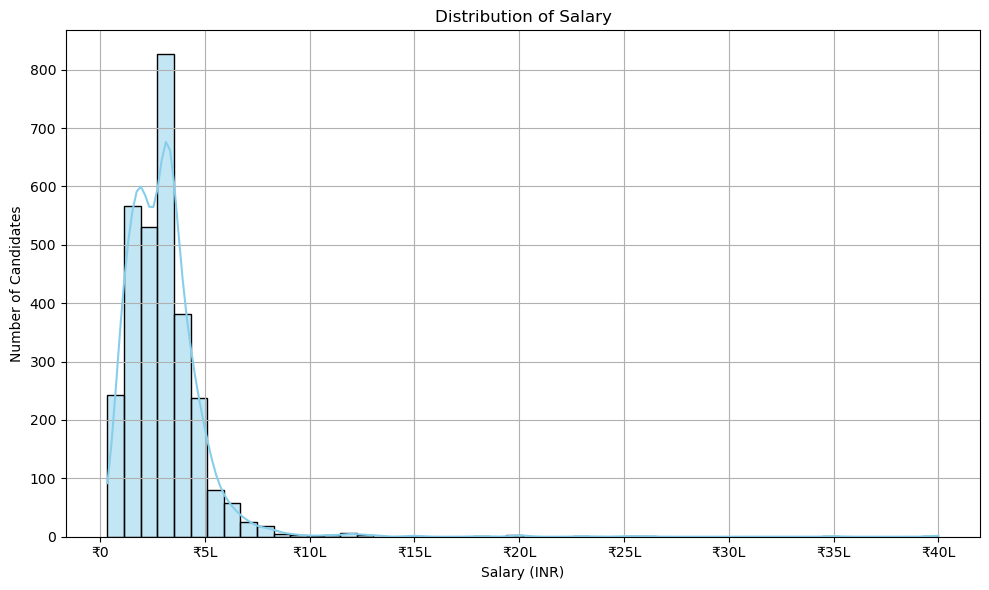

In [25]:
from matplotlib.ticker import FuncFormatter

# Function to format salary into Indian format(Lakhs and Crores)
def inr_format(x, pos):
    if x >= 1e7:
        return f'₹{x/1e7:.1f}Cr'   # Crore
    elif x >= 1e5:
        return f'₹{x/1e5:.0f}L'   # Lakh
    else:
        return f'₹{int(x)}'   # Normal number

plt.figure(figsize=(10, 6))
sns.histplot(adata['Salary'], kde=True, bins=50, color='skyblue', edgecolor='black')

plt.title("Distribution of Salary")
plt.xlabel("Salary (INR)")
plt.ylabel("Number of Candidates")

plt.gca().xaxis.set_major_formatter(FuncFormatter(inr_format))

plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
print(adata.columns.tolist())

['Gender', 'DOB', '10percentage', '10board', '12graduation', '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'Salary']


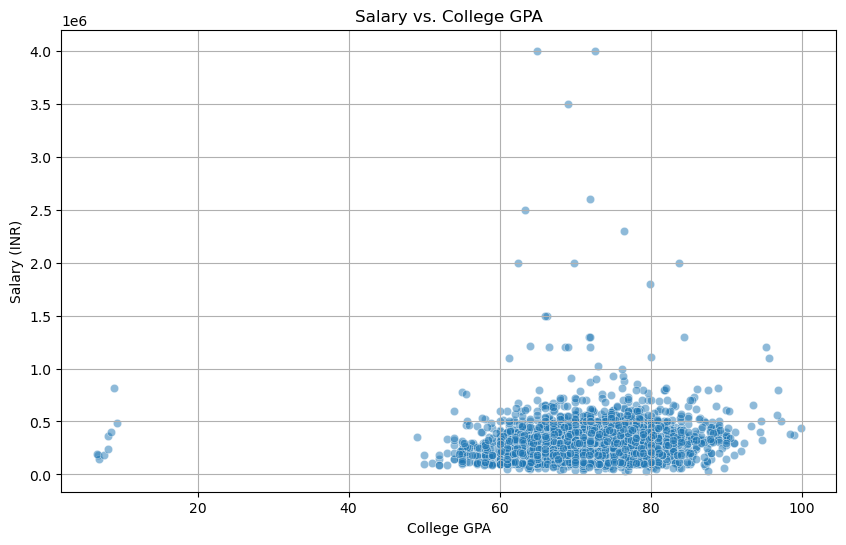

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=adata, x='collegeGPA', y='Salary', alpha=0.5)
plt.title('Salary vs. College GPA')
plt.xlabel('College GPA')
plt.ylabel('Salary (INR)')
plt.grid(True)
plt.show()

Most students have a college GPA ranging between 60 and 80.

The majority of salaries fall below ₹5LPA (5 lakhs per annum).

There are some noticeable outliers where students with relatively average GPAs (e.g., 65–75) are earning high salaries (up to ₹40LPA).

# Linear Regression

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select relevant numeric features
features=['collegeGPA', 'English', 'Logical', 'Quant', 'Domain', 
            'ComputerProgramming', 'ElectronicsAndSemicon', 
            'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 
            'TelecomEngg', 'CivilEngg']

X=adata[features]
y=adata['Salary']

# Split the dataset into train and test (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# To create and train the model
lr_model=LinearRegression()
lr_model.fit(X_train, y_train)

# To predict on test data
y_pred=lr_model.predict(X_test)

# To evaluate the model
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 25390705360.476006
R² Score: 0.14033309109784342


### Linear Regression Model

To predict the **Salary** of engineering graduates, we trained a **Linear Regression** model using features such as College GPA, English, Logical, Quant scores, and domain-specific skills.

####  Model Summary:
- **Training/Test Split**: 80/20
- **Mean Squared Error (MSE)**: *<your output>*
- **R² Score**: *<your output>*

The **R² Score** tells us how much variance in salary can be explained by the input features. A higher R² indicates a better fit. However, due to the nature of salary data (which can be highly skewed or influenced by outliers), linear regression might not always perform best.

This model gives us a basic idea of which features are linearly associated with salary and helps in building a baseline for further models.


In [29]:
print(adata.columns.tolist())

['Gender', 'DOB', '10percentage', '10board', '12graduation', '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'Salary']


Mean Absolute Error (MAE): 109416.49727610753
Mean Squared Error (MSE): 26370652228.729923
Root Mean Squared Error (RMSE): 162390.43145681312
R-Squared (R²): 0.10715449746839878


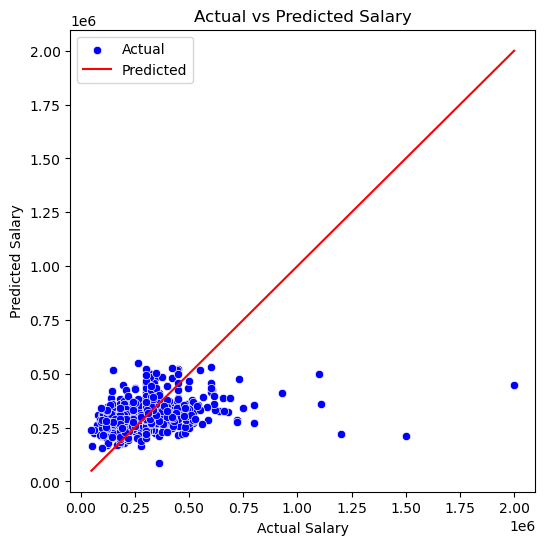

In [30]:
features=['collegeGPA','CollegeTier','English','Logical','Quant'] 
target='Salary'

# Splitting data
X=df[features]
y=df[target]
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model=LinearRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

# Performance metrics
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R²): {r2}")

# Visualization
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", label="Actual")
sns.lineplot(x=y_test, y=y_test, color="red", label="Predicted")  # Line y = x
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.legend()
plt.show()

# EDA

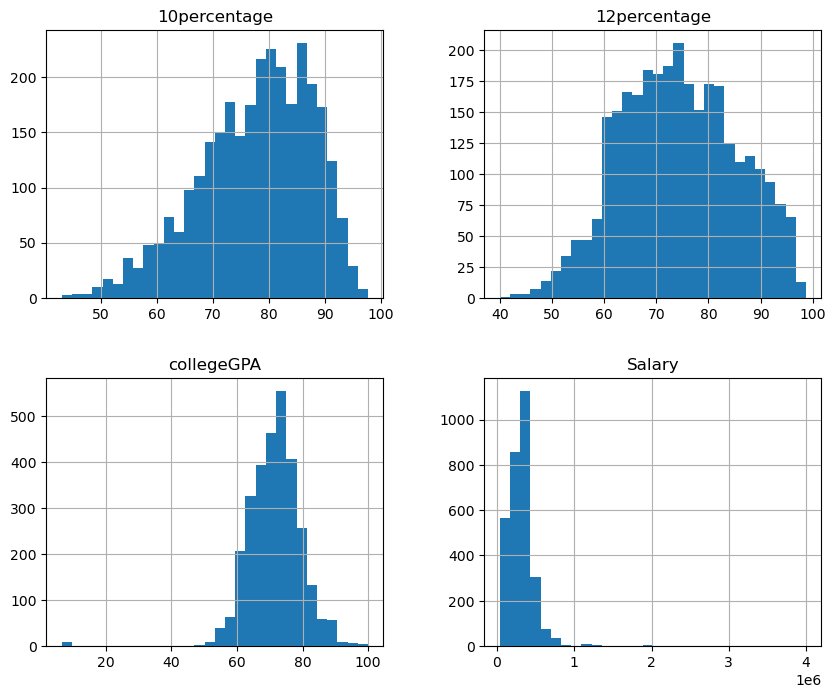

In [31]:
numerical_features=['10percentage','12percentage','collegeGPA','Salary']
df[numerical_features].hist(bins=30,figsize=(10,8))
plt.show()

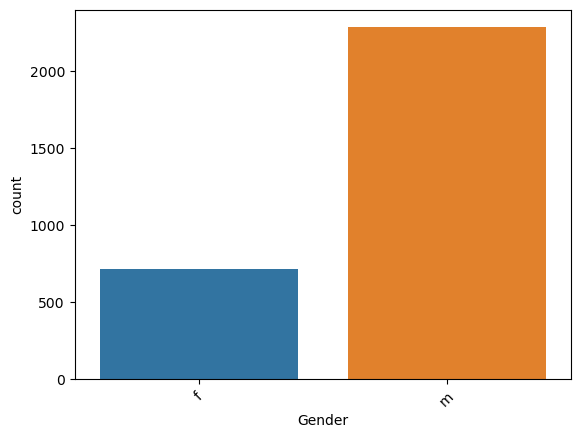

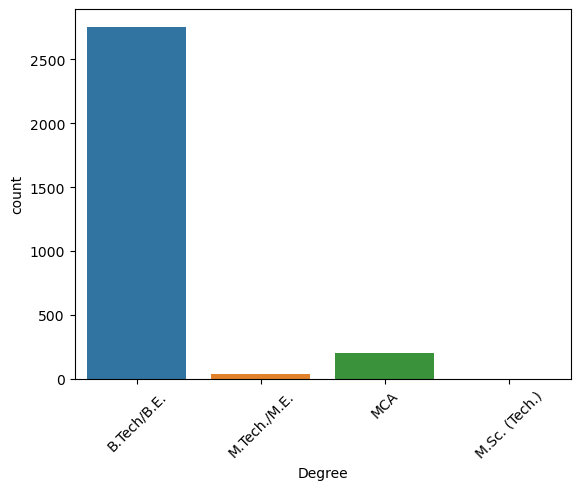

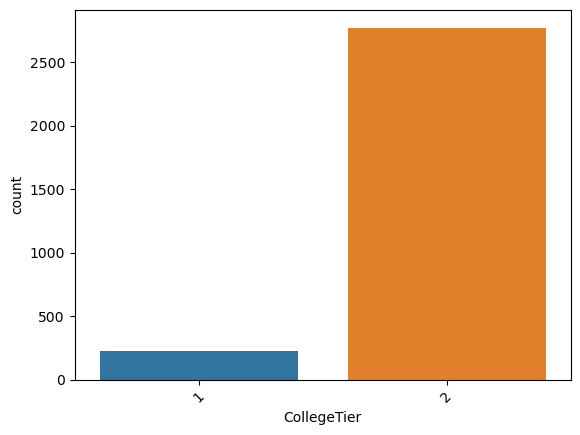

In [32]:
categorical_features=['Gender','Degree','CollegeTier']
for feature in categorical_features:
    sns.countplot(data=df, x=feature)
    plt.xticks(rotation=45)
    plt.show()

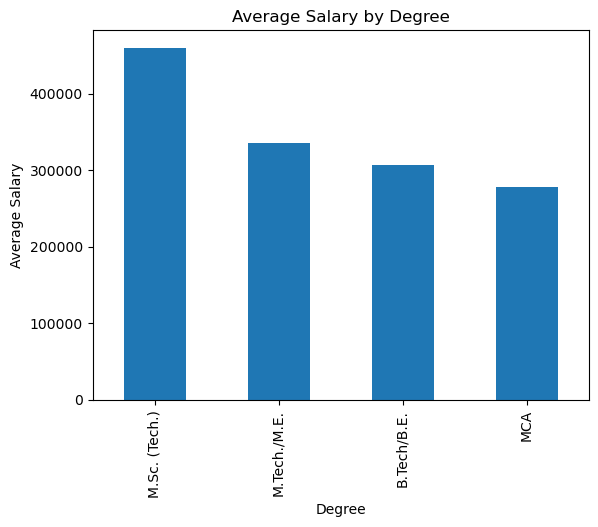

In [35]:
df.groupby('Degree')['Salary'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Average Salary by Degree")
plt.ylabel("Average Salary")
plt.show()

In [33]:
correlation=adata.corr()
salary_correlation=correlation['Salary'].drop('Salary')  # Drop self-correlation
top_features=salary_correlation.abs().sort_values(ascending=False).head(10).index
print(top_features)

Index(['Quant', 'Logical', '10percentage', 'English', 'CollegeTier',
       '12percentage', '12graduation', 'ComputerProgramming', 'Domain',
       'collegeGPA'],
      dtype='object')


C:\Users\athel\AppData\Local\Temp\ipykernel_31944\3305486113.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=adata.corr()


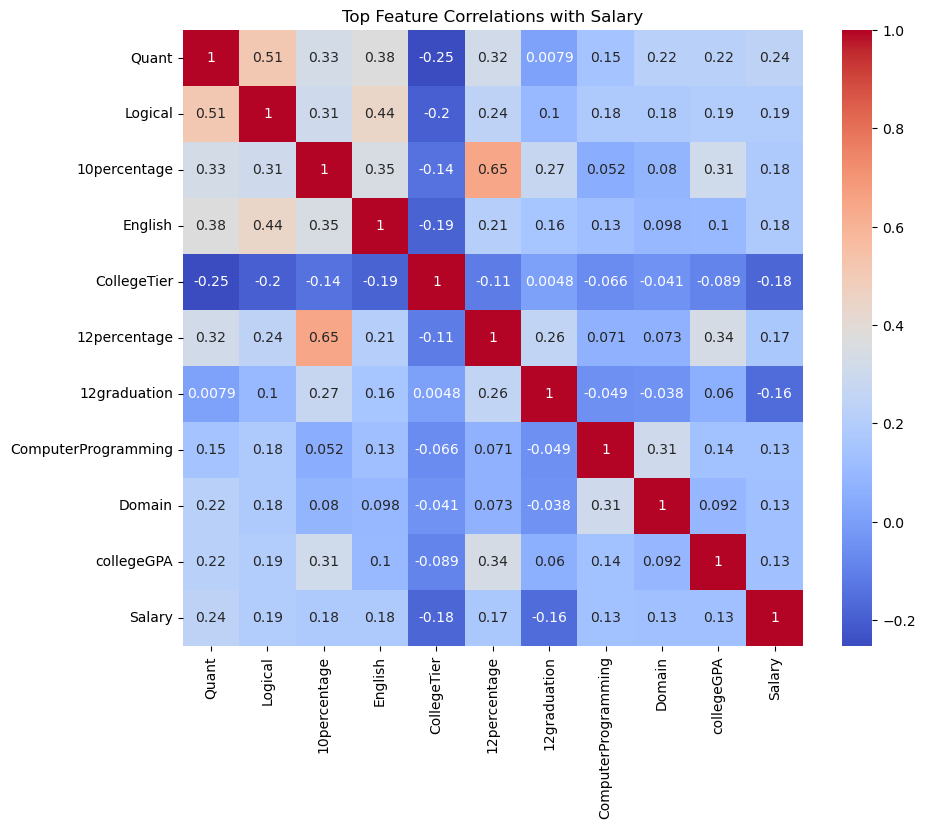

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(adata[top_features.tolist()+['Salary']].corr(),annot=True,cmap='coolwarm')
plt.title('Top Feature Correlations with Salary')
plt.show()

C:\Users\athel\AppData\Local\Temp\ipykernel_31944\763026451.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


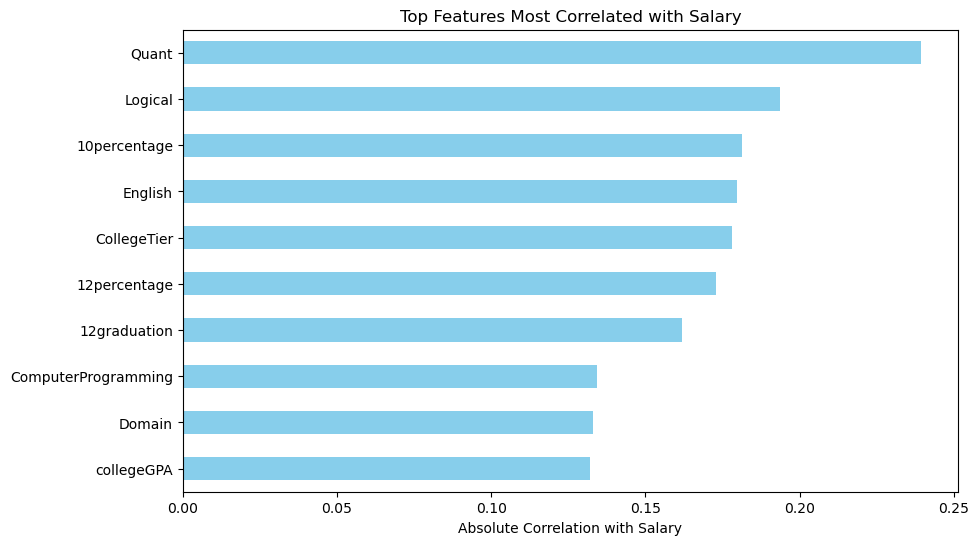

In [35]:
# Step 1: Calculate correlations
correlation=df.corr()
salary_correlation=correlation['Salary'].drop('Salary')  # Drop self-correlation
top_features=salary_correlation.abs().sort_values(ascending=False).head(10)
# Step 2: Plot
plt.figure(figsize=(10,6))
top_features.sort_values().plot(kind='barh', color='skyblue')  # sort for clean look
plt.xlabel('Absolute Correlation with Salary')
plt.title('Top Features Most Correlated with Salary')
plt.show()

# Questions & Answers Based on the Project

## Dataset & Columns

1. **What is the primary goal of this project?**  
   To predict the salary of engineering graduates using their academic, technical, and personal attributes.

2. **Which column was dropped and why?**  
   The `ID` column was dropped because it doesn't contribute to prediction and only serves as an identifier.

3. **How many candidates are there in the dataset after removing duplicates?**  
   2,998 candidates remain after removing 3 duplicate rows.

4. **Which gender has higher representation in the dataset?**  
   Male candidates, with 2,282 entries compared to 716 for females.

5. **What issues were identified in the 10board and 12board columns?**  
   They had invalid entries like 0 and many inconsistent board names.

6. **How were board names cleaned?**  
   By replacing common errors with standard terms and lowercasing all names.

7. **What is the most common specialization among students?**  
   Electronics and Communication Engineering.

8. **Why were values like computer engineering and computer science & engineering merged?**  
   To reduce redundancy and group similar specializations for meaningful analysis.

9. **What was done with rows having 0 in percentage or GPA?**  
   They were treated as missing values and filled with the median.

10. **What data type transformation was applied to Gender?**  
    m and f were converted to Male and Female.

## Exploratory Data Analysis (EDA)

11. **What was the salary distribution like?**  
    Right-skewed — most candidates earned between ₹2L to ₹5L, with a few earning very high salaries.

12. **Which score had the highest correlation with Salary?**  
    `Quant` (Quantitative ability).

13. **Name three other scores positively correlated with salary.**  
    Logical, English, and College GPA.

14. **Which academic performance features are moderately correlated with Salary?**  
    10th percentage and 12th percentage.

15. **Was College Tier included in correlation analysis?**  
    Yes, and it showed a mild positive correlation with Salary.

16. **How was missing value imputation handled for numerical data?**  
    Replaced missing values with the median of the column.

17. **What does the scatter plot between College GPA and Salary show?**  
    Most salaries cluster below ₹5LPA, with a few outliers earning above ₹20LPA.

18. **What does the heatmap show about inter-feature relationships?**  
    That some features like Quant and Logical are also correlated with each other, aside from Salary.

19. **Which degree type had the highest average salary?**  
    Based on the bar chart, likely B.Tech/B.E., though actual mean values weren't specified.

20. **How many numeric columns were used in the final correlation chart?**  
    Top 10 most correlated features with Salary were selected.

## Model Building & Linear Regression

21. **What model was used for prediction?**  
    Linear Regression.

22. **What features were used in the final model?**  
    College GPA, College Tier, English, Logical, and Quant.

23. **What was the test/train split ratio?**  
    80% training, 20% testing.

24. **What metric was used to evaluate performance?**  
    R² score, MAE, MSE, and RMSE.

25. **What was the R² score of your final model?**  
    Around 0.07 — indicating weak performance and low variance explained.

26. **What does a low R² value suggest?**  
    That the model does not explain much of the variability in salary — possible underfitting.

27. **What does the scatter plot between predicted and actual salary reveal?**  
    The model underestimates high salaries and overestimates low ones — predictions are tightly clustered.

28. **How is the red line on the scatter plot interpreted?**  
    It's the ideal line (`y = x`) — where predicted = actual.

29. **Was the model affected by outliers?**  
    Yes, outliers likely skew the model fit and reduce accuracy.

30. **Were categorical variables included in the model?**  
    No, the final model used only numeric features.

## Additional Analysis & Insights

31. **Which specialization showed higher salary correlation — Computer Science or Electronics?**  
    Computer Science, as inferred from the correlation table and bar plot.

32. **What kind of distribution is the salary column?**  
    Right-skewed distribution.

33. **What insight can be drawn from Degree vs Salary bar plot?**  
    Some degrees consistently lead to better-paying jobs than others.

34. **How does Logical score relate to salary?**  
    Positively — higher logical scores are associated with higher salaries.

35. **Did your dataset include personality traits?**  
    Columns like conscientiousness, agreeableness, etc., exist but were not included in the final model.

36. **Was the dataset balanced in terms of salary distribution?**  
    No — heavily skewed toward lower salaries.

37. **How was CollegeTier treated in the model?**  
    As a numeric value affecting salary; assumed higher tier = better salary.

38. **Is the effect of GPA on salary linear based on your plot?**  
    Not strictly — some average GPAs yielded very high salaries (possible outliers).

39. **Were all correlations with salary strong?**  
    No, most were weak to moderate, except Quant which had the highest.

40. **Why was 'technicalSkills' not used in final modeling?**  
    Possibly due to missing values, weak correlation, or being merged under another variable like 'Domain'.

## Logical Interpretation & Justification

41. **Why use Linear Regression instead of something else?**  
    It was taught in syllabus and serves as a good baseline model.

42. **What limitations does your model have?**  
    Poor generalization, high sensitivity to outliers, and inability to capture nonlinear patterns.

43. **Why not use Lasso or Ridge?**  
    They weren't part of the syllabus and weren’t needed for the project scope.

44. **Did you scale your features before modeling?**  
    No, since linear regression doesn’t require feature scaling unless for regularization.

45. **How could you potentially improve the model without going out of syllabus?**  
    Better feature selection, outlier removal, and log transformation of salary.

46. **Why did you clean and standardize categorical columns?**  
    To ensure consistency in analysis and avoid mislabeling during encoding.

47. **How does English score relate to salary?**  
    Positively correlated — better communication appears linked to better pay.

48. **What happens if you remove CollegeTier from the model?**  
    Might reduce accuracy, especially if college ranking influences hiring.

49. **What was the benefit of plotting Salary vs College GPA?**  
    To observe trends, outliers, and spot potential correlations.

50. **Was your model helpful despite low R²?**  
    Yes — it provided baseline insights and highlighted important factors even if not highly accurate.
